## Linear Regression Implementation

In [1]:
# Import necessary libraries
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd

In [2]:
# Create a DataFrame with sample data
data = pd.DataFrame({"marks": [34, 95, 64, 88, 99, 51],
                     "salary": [3400, 9500, 6400, 8800, 9900, 5100]})

# Introduce some noise into the salary
np.random.seed(0)  # for reproducibility
data['salary'] = data['salary'] + np.random.normal(0, 500, len(data))

# Extract input (X) and output (y) variables
X = data[['marks']].values
y = data['salary'].values

# Print the shapes of X and y
print(X.shape, y.shape)

(6, 1) (6,)


In [3]:
# Initialize and train the Linear Regression model
reg = LinearRegression()
reg.fit(X, y)

predictions = reg.predict(X)
print(predictions)

[ 3692.38764403 10163.95948608  6875.12789422  9421.32009437
 10588.32485277  5495.94045247]


In [4]:
# Make predictions with the model
print("Predicted salary for a mark of 70:", reg.predict([[70]]))
print("Predicted salaries for marks 100, 50, 80:",
      reg.predict([[100], [50], [80]]))

# Print the coefficient and intercept of the regression line
print("Coefficient:", reg.coef_)
print("Intercept:", reg.intercept_)

Predicted salary for a mark of 70: [7511.67594426]
Predicted salaries for marks 100, 50, 80: [10694.41619445  5389.8491108   8572.58936099]
Coefficient: [106.09134167]
Intercept: 85.28202715413772


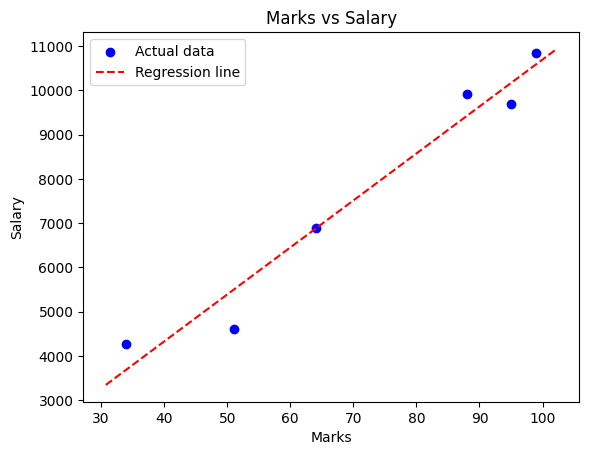

In [5]:
# Plot the data points and the regression line
fig, ax = plt.subplots()
plt.scatter(X, y, color='blue', label='Actual data')

# Plot the regression line
x_vals = np.array(ax.get_xlim())
y_vals = reg.intercept_ + reg.coef_ * x_vals
plt.plot(x_vals, y_vals, '--', color='red', label='Regression line')

ax.legend()
plt.xlabel('Marks')
plt.ylabel('Salary')
plt.title('Marks vs Salary')
plt.show()

In [6]:
# Create a results table to compare actual and predicted values
results_table = pd.DataFrame(data=X, columns=['Marks'])
results_table['Predicted Salary'] = reg.predict(X)
results_table['Actual Salary'] = y
results_table['Error'] = results_table['Actual Salary'] - \
    results_table['Predicted Salary']
results_table['Error Squared'] = results_table['Error'] ** 2

In [11]:
print(results_table)

   Marks  Predicted Salary  Actual Salary       Error  Error Squared
0     34       3692.387644    4282.026173  589.638529  347673.594822
1     95      10163.959486    9700.078604 -463.880882  215185.472591
2     64       6875.127894    6889.368992   14.241098     202.808867
3     88       9421.320094    9920.446600  499.126505  249127.268222
4     99      10588.324853   10833.778995  245.454142   60247.735973
5     51       5495.940452    4611.361060 -884.579392  782480.701480


In [8]:
# Calculate and print error metrics
mae = np.abs(results_table['Error']).mean()
mse = results_table['Error Squared'].mean()
rmse = math.sqrt(mse)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)

Mean Absolute Error: 449.4867581035685
Mean Squared Error: 275819.5969925311
Root Mean Squared Error: 525.1852977688267


In [9]:
# Using sklearn's mean_squared_error function for verification
print("Mean Squared Error (sklearn):", mean_squared_error(
    results_table['Actual Salary'], results_table['Predicted Salary']))
print("Root Mean Squared Error (sklearn):", math.sqrt(mean_squared_error(
    results_table['Actual Salary'], results_table['Predicted Salary'])))
print("Mean Absolute Error:", mae)  

# Calculate and print R-squared value
print("R Squared: %.2f" % r2_score(y, reg.predict(X)))

Mean Squared Error (sklearn): 275819.5969925311
Root Mean Squared Error (sklearn): 525.1852977688267
Mean Absolute Error: 449.4867581035685
R Squared: 0.96


## Logistic Regression Implementation

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


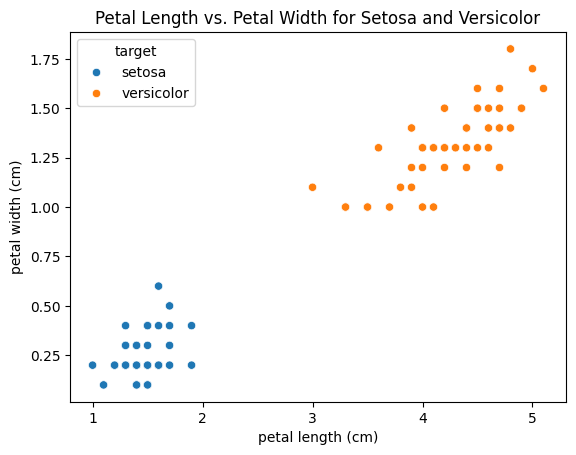

In [13]:
import pandas as pd
from sklearn import datasets
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = datasets.load_iris()

# Print the dataset keys to understand the structure
print(iris.keys())

# Create a DataFrame with feature names
iris_data = pd.DataFrame(iris['data'], columns=iris['feature_names'])

# Add the target column to the DataFrame
iris_data['target'] = iris['target']

# Map the target values to their respective target names
iris_data['target'] = iris_data['target'].apply(
    lambda x: iris['target_names'][x])

# Filter the DataFrame to include only setosa and versicolor species
df = iris_data.query("target=='setosa' | target=='versicolor'")

# Plot the data using Seaborn
sns.scatterplot(data=df, x="petal length (cm)",
                y="petal width (cm)", hue="target")
plt.title("Petal Length vs. Petal Width for Setosa and Versicolor")
plt.show()

## Visualizing the Decision Boundary

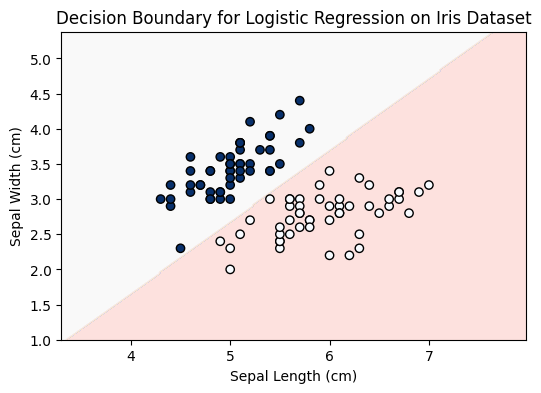

In [19]:
from sklearn.linear_model import LogisticRegression

# Load the Iris dataset
iris = datasets.load_iris()
iris_data = pd.DataFrame(iris['data'], columns=iris['feature_names'])
iris_data['target'] = iris['target']
iris_data['target'] = iris_data['target'].apply(
    lambda x: iris['target_names'][x])

# Filter the DataFrame to include only setosa and versicolor species
df = iris_data.query("target=='setosa' | target=='versicolor'")[
    ['sepal length (cm)', 'sepal width (cm)', 'target']]

# Prepare the data
X = df.drop(columns=['target']).values
y = df['target'].values
y = np.array([1 if x == 'setosa' else 0 for x in y])

# Initialize and fit the logistic regression model
logistic_regression = LogisticRegression()
logistic_regression.fit(X, y)

# Define the mesh grid
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Predict the decision boundary
Z = logistic_regression.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.rcParams['figure.figsize'] = (6, 4)
plt.figure()
plt.contourf(xx, yy, Z, alpha=0.4, cmap='Pastel1')
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='Blues', edgecolors='k')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Decision Boundary for Logistic Regression on Iris Dataset')
plt.show()